In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/cataract-classification-dataset/train/mature/27_jpg.rf.a1dce64f107fce163c9e60c809837ec7.jpg
/kaggle/input/cataract-classification-dataset/train/mature/16_jpg.rf.37199d7eba9adf735f3318c7937c9f6e.jpg
/kaggle/input/cataract-classification-dataset/train/mature/18_jpg.rf.e941263a8c0fb13df2d8af4b3ebb40b3.jpg
/kaggle/input/cataract-classification-dataset/train/mature/14_JPG_jpg.rf.d1a87e52ea65165f9996428dd55d1f70.jpg
/kaggle/input/cataract-classification-dataset/train/mature/13_JPG_jpg.rf.5957ca9500179574af9a2b4f9e6d46c3.jpg
/kaggle/input/cataract-classification-dataset/train/mature/2_JPG.rf.5130f9b077ed0654a1c354154459df62.jpg
/kaggle/input/cataract-classification-dataset/train/mature/10_JPG_jpg.rf.60c0165f6221e7d3b7bc8e16b9214652.jpg
/kaggle/input/cataract-classification-dataset/train/mature/24_jpg.rf.3c181f2946e53ba0de169b16a295dc94.jpg
/kaggle/input/cataract-classification-dataset/train/mature/23_jpg.rf.64e6883d7bd42f4b7587b25dabf3fed4.jpg
/kaggle/input/cataract-classificati

# **Import**

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

# **1.Data Import**

In [80]:
def get_images(directory):
    images = []
    
    for filename in os.listdir(directory):
        try:
            img = Image.open(os.path.join(directory, filename))
            img = img.resize((128, 128))
            img = img.convert('RGB')
            img = np.array(img) / 255.0
            images.append(img)
        except OSError as e:
            print(f"Error loading {os.path.join(directory, filename)}: {e}")
            continue
    return images

In [81]:
imamature = get_images('/kaggle/input/cataract-classification-dataset/train/immature')
mature = get_images('/kaggle/input/cataract-classification-dataset/train/mature')

# **2. Data Visualization**

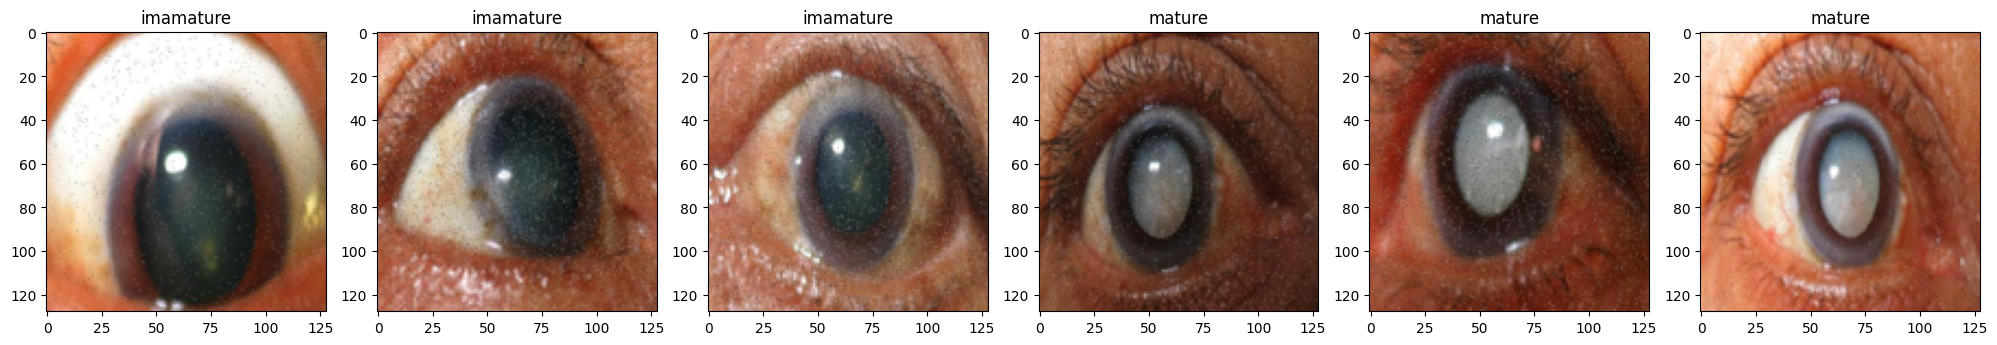

In [82]:
fig, ax = plt.subplots(1, 6, figsize=(20, 10))

ax[0].imshow(imamature[0])
ax[1].imshow(imamature[1])
ax[2].imshow(imamature[2])
ax[3].imshow(mature[0])
ax[4].imshow(mature[1])
ax[5].imshow(mature[2])
ax[0].set_title('imamature')
ax[1].set_title('imamature')
ax[2].set_title('imamature')
ax[3].set_title('mature')
ax[4].set_title('mature')
ax[5].set_title('mature')

for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

# **3. Data Transfrom**

In [83]:
train_images = np.concatenate((imamature, mature))
train_labels = np.concatenate((np.ones(len(imamature)), np.zeros(len(mature))))

**Data Pipeline**

In [84]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

In [85]:
batch_size = 32

train = train_ds.shuffle(buffer_size=len(train_images)).batch(batch_size)

# **4. Modeling**

In [86]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(128, 128, 3), padding='valid'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [87]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
history = model.fit(train, validation_data = train, epochs = 10, verbose = 1)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 651ms/step - accuracy: 0.5585 - loss: 0.6811 - val_accuracy: 0.7195 - val_loss: 0.5123
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 681ms/step - accuracy: 0.7514 - loss: 0.4794 - val_accuracy: 0.9244 - val_loss: 0.1935
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 647ms/step - accuracy: 0.8993 - loss: 0.2274 - val_accuracy: 0.9805 - val_loss: 0.0904
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 635ms/step - accuracy: 0.9729 - loss: 0.0943 - val_accuracy: 0.9902 - val_loss: 0.0585
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 683ms/step - accuracy: 0.9631 - loss: 0.1062 - val_accuracy: 1.0000 - val_loss: 0.0215
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 640ms/step - accuracy: 0.9968 - loss: 0.0262 - val_accuracy: 0.9317 - val_loss: 0.1297
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 633ms/step - accuracy: 0.9762 - loss: 0.0814 - val_accuracy: 0.9951 - val_loss: 0.0211
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 629ms/step - accuracy: 0.9950 - loss: 0.0196 - val_accuracy:

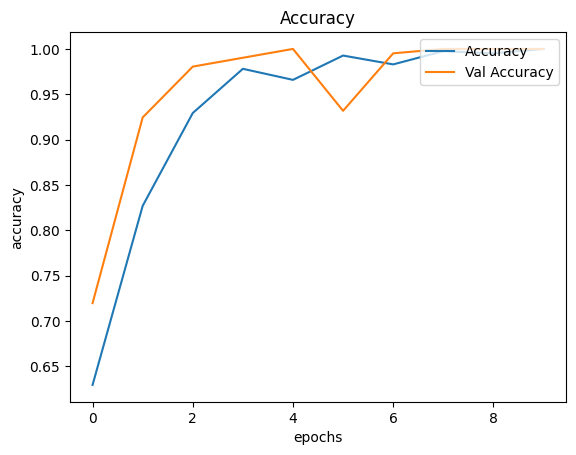

In [89]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc = 'upper right')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

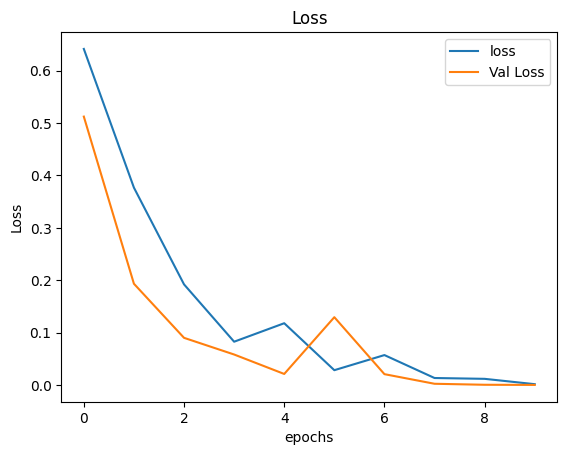

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'Val Loss'], loc = 'upper right')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

**Please leave your advice in the comments. Thank you**